In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [161]:
chip = pd.read_csv('chipotle.tsv', sep='\t')

In [162]:
chip

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


Данные представляют собой таблицу с меню мексиканского ресторана (фвероятно за какой-то промежуток времени) в таблице 4622 строки и 5 колонок

In [163]:
a=[]
for item in chip['item_name']:
  a.append(item)

len(set(a))

50

In [164]:
len(chip['item_name'].unique())

50

в таблицу попало 1834 заказа, всего там 50 уникальных категорий заказа посчитано 2 способами

In [165]:
print(chip['order_id'].isnull().any().any())
print(chip['quantity'].isnull().any().any())
print(chip['item_name'].isnull().any().any())
print(chip['choice_description'].isnull().any().any())
print(chip['item_price'].isnull().any().any())

False
False
False
True
False


In [166]:
print(chip['choice_description'].isnull().sum())

1246


In [167]:
chip['choice_description'].isna()[0]
len(chip['choice_description'].isnull())

4622

 Как мы видим пропуски есть только в столбце с описанием выбора(?) и их 1246

In [168]:
for i in range(len(chip['choice_description'].isnull())):
  if chip['choice_description'].isnull()[i] == np.True_:
    chip['choice_description'][i] = ''
chip

Выходные данные были обрезаны до нескольких последних строк (5000).
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  chip['choice_description'][i] = ''
/tmp/ipython-input-2279482702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chip['choice_description'][i] = ''
/tmp/ipython-input-2279482702.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical exa

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


Замена на пустые строки прошла успешно

In [169]:
for i in range(len(chip['item_price'])):
  chip['item_price'][i] = float(chip['item_price'][i][1:])
chip

Выходные данные были обрезаны до нескольких последних строк (5000).
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  chip['item_price'][i] = float(chip['item_price'][i][1:])
/tmp/ipython-input-2550837409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chip['item_price'][i] = float(chip['item_price'][i][1:])
/tmp/ipython-input-2550837409.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [170]:
print('средняя цена', chip['item_price'].mean())
print('min price', chip['item_price'].min())
print('max price', chip['item_price'].max())

средняя цена 7.464335785374397
min price 1.09
max price 44.25


In [171]:
chip_no_dub = chip.drop_duplicates(subset=['item_price'])
chip_no_dub.sort_values(by=['item_price'])['item_name'][len(chip_no_dub) - 5:len(chip_no_dub)]

,item_name
409,Chicken Bowl
3601,Veggie Burrito
1254,Chicken Burrito
3480,Carnitas Bowl
3598,Chips and Fresh Tomato Salsa


Выше выведены 5 самых дорогих позиций

In [172]:
len(chip['item_name'][(chip.item_name == 'Chicken Bowl') & (chip.quantity > 1)])

33

33 раза куриный боул покупали более 1 раза

In [173]:
chip_price = chip.groupby('order_id')['item_price'].mean()
print(chip_price.mean())

7.841910975496643


средний чек 7 долларов 84 цента

In [174]:
chip_q = chip.groupby('order_id')['quantity'].mean()
print(chip_q.mean())

1.083282368001561


 В среднем заказывают по 1 позиции, или если быть точнее 108 позиций на 100 заказов

In [175]:
chip['item_price'].mean()

np.float64(7.464335785374397)

как мы видим в целом данные соотносятся

In [176]:
len(chip_q[(chip.quantity == 1)])

1737

1737 orders have only one item

In [177]:
print(max(chip.groupby('item_name')['quantity'].sum()) )
chip_q_it = chip.groupby('item_name')['quantity'].sum()
idx = chip_q_it[chip_q_it == max(chip.groupby('item_name')['quantity'].sum()) ].index
print(chip_q_it[idx])
print(idx)

761
item_name
Chicken Bowl    761
Name: quantity, dtype: int64
Index(['Chicken Bowl'], dtype='object', name='item_name')


самый популярный продукт чикен боул, его заказали 761 раз

In [178]:
uniq_it = chip['item_name'].unique()
it_pr = chip.groupby('item_name')['item_price'].mean()

In [179]:
typ_bur = []
for i in uniq_it:
  line = i.split(' ')
  for word in line:
    if word == "Burrito":
      typ_bur.append(i)
      print(chip_q_it[i], ' ', i)


386   Steak Burrito
591   Chicken Burrito
91   Barbacoa Burrito
60   Carnitas Burrito
97   Veggie Burrito
6   Burrito


6 types of burrito

In [180]:
av = chip.groupby('order_id')['item_price'].transform('sum')

chip['sum_price'] = av

quantity_40 = chip[chip['item_price'] > 0.4 * chip['sum_price']].groupby('order_id').sum()
quantity_40

,quantity,item_name,choice_description,item_price,sum_price
order_id,,,,,
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98
3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,12.67
4,2,Steak BurritoSteak Soft Tacos,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",21.0,42.0
5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,13.7
6,2,Chicken Crispy TacosChicken Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",17.5,35.0
...,...,...,...,...,...
1829,2,Steak BurritoVeggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, S...",23.0,48.5
1830,2,Steak BurritoVeggie Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",23.0,46.0
1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",9.25,12.9


1624 have an item wich costs over 40% from all price of order

In [181]:
matrix = [
    ['Убийственный класс', '(комедия/боевик)'],
    ['Стальной Алхимик: Братство', '(боевик)'],
    ['Саики Кусуо', '(комедия)'],
    ['Твоя апрельская ложь', '(романтика/драма)'],
    ['Нитидзё', '(комедия)'],
    ['Steins;Gate', '(фантастика/триллер)'],
    ['Хоримия', '(романтика)'],
    ['Моя геройская академия', '(комедия/боевик)'],
    ['Fate/Zero', '(триллер/боевик)'],
    ['Корзинка фруктов', '(романтика)'],
    ['Плутон', '(триллер/боевик)'],
    ['Галактика Татами', '(комедия/фантастика)'],
    ['Атака титанов', '(боевик/триллер)'],
    ['Ковбой Бибоп', '(фантастика/боевик)'],
    ['Шова Генроку Ракуго Синдзю', '(драма)']
]

In [182]:
matrix = np.matrix(matrix)
matrix = matrix.T
column1 = matrix[0].tolist()[0]
column2 = matrix[1].tolist()[0]
df_anime = pd.DataFrame({
    'index': [i+1 for i in range(len(column1))],
    'column1': column1,
    'column2': column2
}, )
df_anime

,index,column1,column2
0,1,Убийственный класс,(комедия/боевик)
1,2,Стальной Алхимик: Братство,(боевик)
2,3,Саики Кусуо,(комедия)
3,4,Твоя апрельская ложь,(романтика/драма)
4,5,Нитидзё,(комедия)
5,6,Steins;Gate,(фантастика/триллер)
6,7,Хоримия,(романтика)
7,8,Моя геройская академия,(комедия/боевик)
8,9,Fate/Zero,(триллер/боевик)
9,10,Корзинка фруктов,(романтика)


In [183]:
df = chip

In [184]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=np.random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
df['date'] = df.order_id.map(dates['date'])

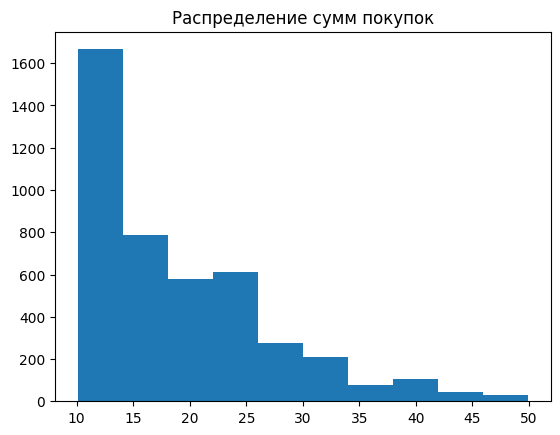

In [185]:
plt.hist(df[df['sum_price'] < 50]['sum_price'])
plt.title("Распределение сумм покупок")
plt.show()

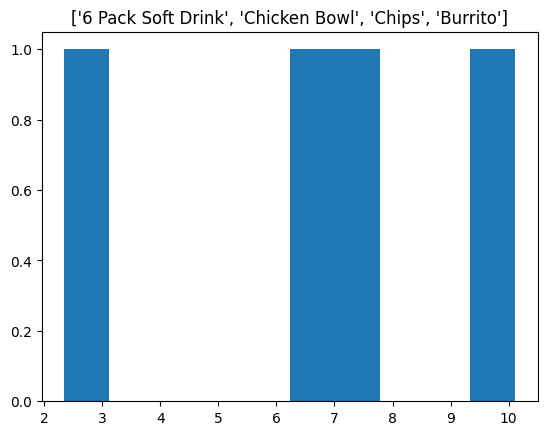

In [186]:
items_list = ['6 Pack Soft Drink', 'Chicken Bowl', 'Chips', 'Burrito']
# plt.hist(df[df['item_name'].isin(items_list)].groupby('item_name')['price'].mean())
plt.hist([(df[df['item_name'] == name]['item_price'].mean()) for name in items_list])
plt.title(r"['6 Pack Soft Drink', 'Chicken Bowl', 'Chips', 'Burrito']")
plt.show()

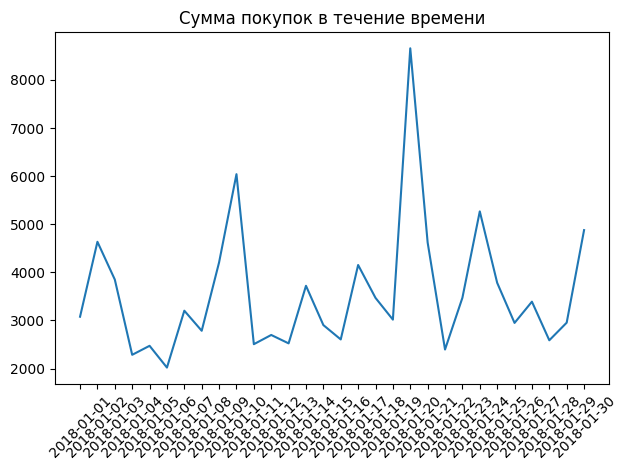

In [187]:
dr = df.groupby(df['date'])['sum_price'].sum()
plt.plot(dr)
plt.title("Сумма покупок в течение времени")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

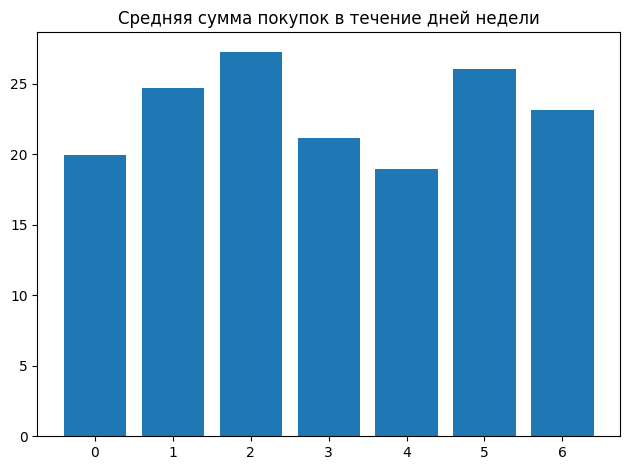

In [188]:
import datetime as dt

dr = df.groupby(pd.to_datetime(df['date']).dt.dayofweek)['sum_price'].mean()
dr = dr.reset_index()

plt.bar(dr['date'], dr['sum_price'])
plt.title("Средняя сумма покупок в течение дней недели")
plt.tight_layout()
plt.show()

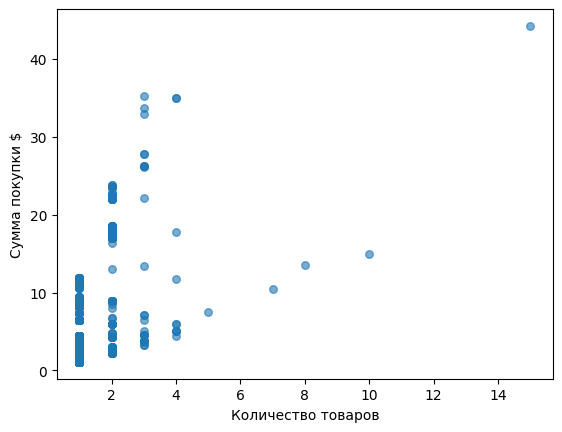

In [189]:
plt.scatter(df['quantity'], df['item_price'], alpha=0.6, s=30)
plt.xlabel('Количество товаров')
plt.ylabel('Сумма покупки $')
plt.savefig('scatter_plot.pdf')
plt.show()